In [16]:
#Importing Libraries
import pandas as pd 
import datetime 
import numpy as np
import scipy.stats
# Download pandas data reader with conda install pandas-datareader
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas import DataFrame
import itertools
from math import sqrt
from scipy.stats import norm
#For optimization
import timeit
%matplotlib inline

In [17]:
#Start date and End date is refers to time period for fetching the data using the Pandas dataframe API
#We have selected data for 2020 up to current time 
start_date = datetime.datetime(2020, 8, 18)
end_date = datetime.datetime(2021, 8, 18)

#Source is yahoo finance
source = 'yahoo'


In [19]:
#We read each ticker and download information from start to end date
all_data = {ticker:web.DataReader(ticker,source,start_date,end_date)
            for ticker in ["BTC-USD", "ETH-USD", "LTC-USD","ETH-USD", "ADA-USD", "XLM-USD", "DOGE-USD"]}

In [20]:
#We store only Adjusted Close price in a seperate dataset for analysis
ticker_price = pd.DataFrame({ticker: data['Adj Close']
                                  for ticker, data in all_data.items()})

In [21]:
#Shape of the Ticker dataframe
ticker_price.shape

(363, 6)

In [22]:
#Saving the csv file for non-redundant data fetching
ticker_price.to_csv("ticker_price.csv")
#ticker_price = pd.read_csv("ticker_price.csv")

In [12]:
#Function to generate geometric brownian motion/ Monte Carlo Simulation
def Monte_Carlo_Sim (N, mu, sigma, S0, dt = 1):
    """
    # This function is used to generate random numbers with geomatric brownian motion
    # mu stands for Compound annual growth rate which is calculated from the analysis part for each of the Crypto
    # sigma is the measure of Annual volatility of returns in a given period of time
    # S0 is the Amount of the Crypto at last date from Ticker data
    """
    X = np.random.normal(mu * dt, sigma* np.sqrt(dt), N) #standard brownian motion using normal distribution
    X = np.cumsum(X) #We perform cumulative sum generated by normal distribution
    S = S0 * np.exp(X) #geometric brownian motion
    N = 100
    return S

#Choosing date range as per the time period
dates = pd.date_range('2020, 8, 18', '2021, 8, 18')
D = (dates.max()-dates.min()).days / 365
N = dates.size
dt = D/N

#Number of Simulations for the process 
m = 100

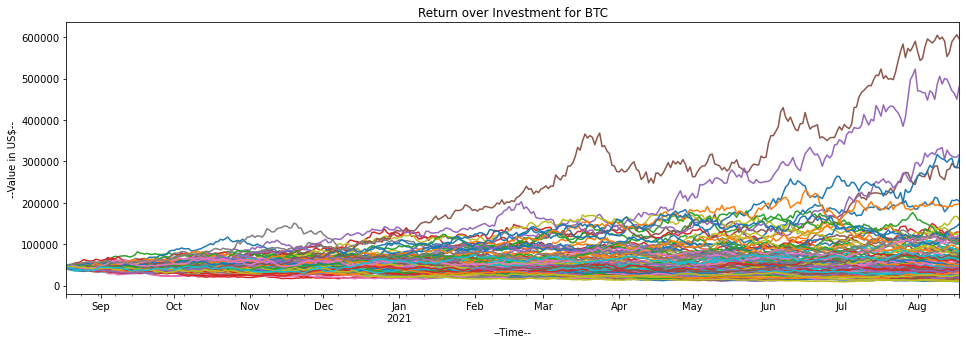

Investment Value = US$44837.21
5% quantile = 34087.21512271632
Median Value in US$= 59896.922807103074
95% quantile = 72331.1493447088
0:00:01.218235


In [13]:
#Using the initial value of the price,we generate plots for each bitcoin with iteration of 1000.
start_time_timeit = datetime.datetime.now()
start_price_BTC = ticker_price["BTC-USD"][-1]
for i in range(m):
    btc = pd.Series(Monte_Carlo_Sim(N, mu = 0.20, sigma=0.74, S0=start_price_BTC, dt = dt), index=dates)
    btc.plot(figsize=(16,5))
plt.xlabel('--Time--')
plt.ylabel('--Value in US$--')
plt.title('Return over Investment for BTC')
plt.show()
print("Investment Value = US$"+ str(round(ticker_price["BTC-USD"][-1],2)))
print("5% quantile =",np.percentile(btc,5))
print("Median Value in US$=",np.percentile(btc,50))
print("95% quantile =",np.percentile(btc,95))
##For optimization
print(datetime.datetime.now()- start_time_timeit)

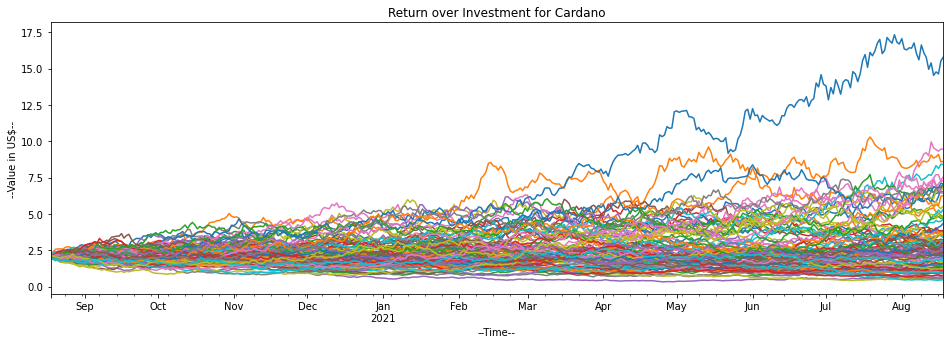

Investment Value = US$2.07
5% quantile = 1.493188199216156
Median Value in US$= 1.8391468970044658
95% quantile = 2.386419044121684
0:00:01.223785


In [25]:
#Using the initial value of the price,we generate plots for each bitcoin with iteration of 1000.
start_time_timeit = datetime.datetime.now()
start_price_ADA = ticker_price["ADA-USD"][-1]
for i in range(m):
    ada = pd.Series(Monte_Carlo_Sim(N, mu = 0.20, sigma=0.74, S0=start_price_ADA, dt = dt), index=dates)
    ada.plot(figsize=(16,5))
plt.xlabel('--Time--')
plt.ylabel('--Value in US$--')
plt.title('Return over Investment for Cardano')
plt.show()
print("Investment Value = US$"+ str(round(ticker_price["ADA-USD"][-1],2)))
print("5% quantile =",np.percentile(ada,5))
print("Median Value in US$=",np.percentile(ada,50))
print("95% quantile =",np.percentile(ada,95))
##For optimization
print(datetime.datetime.now()- start_time_timeit)

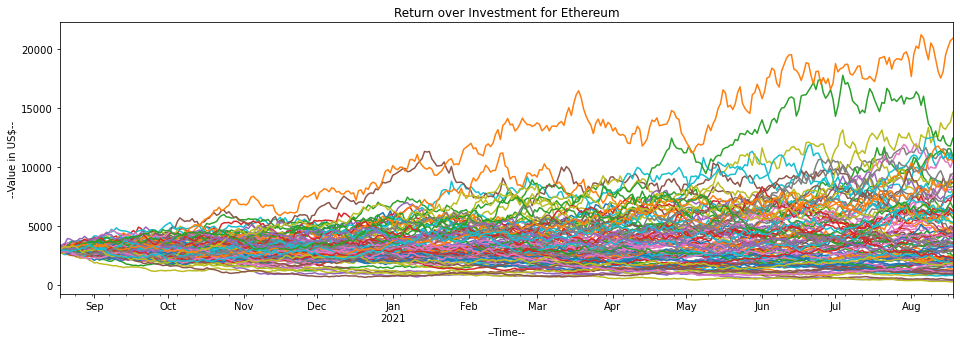

Investment Value = US$3026.55
5% quantile = 2130.7606024149454
Median Value in US$= 3994.8294320205478
95% quantile = 5578.295253124617
0:00:01.163243


In [23]:
#Using the initial value of the price,we generate plots for each bitcoin with iteration of 1000.
start_time_timeit = datetime.datetime.now()
start_price_ETH = ticker_price["ETH-USD"][-1]
for i in range(m):
    eth = pd.Series(Monte_Carlo_Sim(N, mu = 0.20, sigma=0.74, S0=start_price_ETH, dt = dt), index=dates)
    eth.plot(figsize=(16,5))
plt.xlabel('--Time--')
plt.ylabel('--Value in US$--')
plt.title('Return over Investment for Ethereum')
plt.show()
print("Investment Value = US$"+ str(round(ticker_price["ETH-USD"][-1],2)))
print("5% quantile =",np.percentile(eth,5))
print("Median Value in US$=",np.percentile(eth,50))
print("95% quantile =",np.percentile(eth,95))
##For optimization
print(datetime.datetime.now()- start_time_timeit)

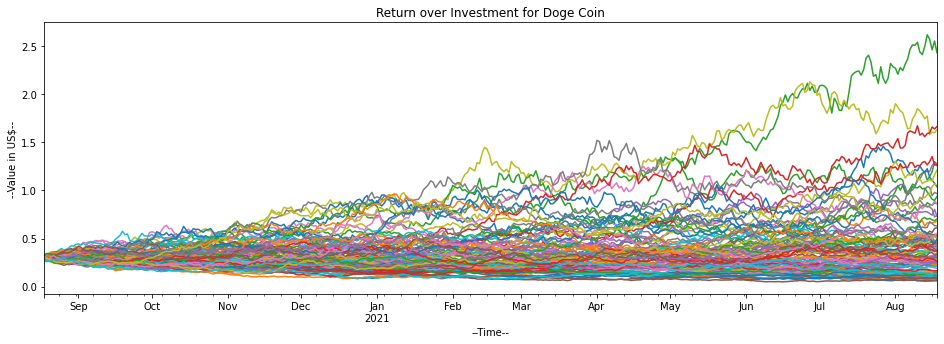

Investment Value = US$0.3
5% quantile = 0.09063844262295587
Median Value in US$= 0.16525983786914572
95% quantile = 0.27526227061453845
0:00:01.189531


In [26]:
#Using the initial value of the price,we generate plots for each bitcoin with iteration of 1000.
start_time_timeit = datetime.datetime.now()
start_price_DOGE = ticker_price["DOGE-USD"][-1]
for i in range(m):
    doge = pd.Series(Monte_Carlo_Sim(N, mu = 0.20, sigma=0.74, S0=start_price_DOGE, dt = dt), index=dates)
    doge.plot(figsize=(16,5))
plt.xlabel('--Time--')
plt.ylabel('--Value in US$--')
plt.title('Return over Investment for Doge Coin')
plt.show()
print("Investment Value = US$"+ str(round(ticker_price["DOGE-USD"][-1],2)))
print("5% quantile =",np.percentile(doge,5))
print("Median Value in US$=",np.percentile(doge,50))
print("95% quantile =",np.percentile(doge,95))
##For optimization
print(datetime.datetime.now()- start_time_timeit)

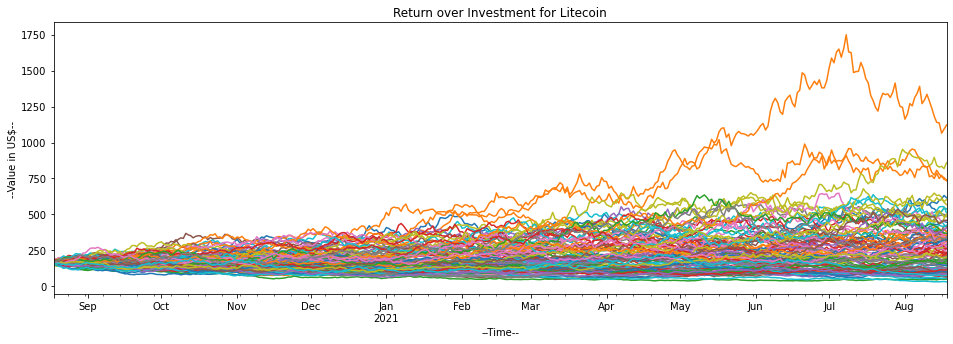

Investment Value = US$166.82
5% quantile = 92.02878997441547
Median Value in US$= 140.46420920713757
95% quantile = 191.7521336293915
0:00:01.168926


In [28]:
#Using the initial value of the price,we generate plots for each bitcoin with iteration of 1000.
start_time_timeit = datetime.datetime.now()
start_price_LTC = ticker_price["LTC-USD"][-1]
for i in range(m):
    ltc = pd.Series(Monte_Carlo_Sim(N, mu = 0.20, sigma=0.74, S0=start_price_LTC, dt = dt), index=dates)
    ltc.plot(figsize=(16,5))
plt.xlabel('--Time--')
plt.ylabel('--Value in US$--')
plt.title('Return over Investment for Litecoin')
plt.show()
print("Investment Value = US$"+ str(round(ticker_price["LTC-USD"][-1],2)))
print("5% quantile =",np.percentile(ltc,5))
print("Median Value in US$=",np.percentile(ltc,50))
print("95% quantile =",np.percentile(ltc,95))
##For optimization
print(datetime.datetime.now()- start_time_timeit)

In [29]:

# Using the initial value of the price,we generate plots for each Ripple with iteration of 1000.
start_time_timeit = datetime.datetime.now()
start_price_XRP = ticker_price["XRP-USD"][-1]
for i in range(m):
    xrp = pd.Series(Monte_Carlo_Sim(N, mu = 1.18, sigma=2.20, S0=start_price_XRP, dt =dt), index=dates)
    xrp.plot(figsize=(16,5))    
plt.xlabel('--Time--')
plt.ylabel('--Value in US$--')
plt.title('Return over Investment for Ripple')
plt.show()
print("Investment Value = US$"+ str(round(ticker_price["XRP-USD"][-1],2)))
print("5% quantile =",np.percentile(xrp,5))
print("Median Value in US$=",np.percentile(xrp,50))
print("95% quantile =",np.percentile(xrp,95))
print(datetime.datetime.now()- start_time_timeit)

KeyError: 'XRP-USD'